# Netflix Exploratory Data Analysis

### The Netflix dataset used in this project is on TV shows and Movies available on Netflix in November 2021.The dataset is available at https://www.kaggle.com/shivamb/netflix-shows and is updated every month. The aim of this project is to analysis this dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
data=pd.read_csv(r"C:\Users\Aaryan\Desktop\JK\Project\netflix_titles.csv")

In [70]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [72]:
data[data.duplicated()] #This tells us the duplicate values in data set.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [73]:
data.isna().sum()   # This tells us the number of Null values in each column of the dataset

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [74]:
for i in  data.columns:
    null_rate=(data[i].isna().sum()/data.shape[0])*100
    if null_rate>0:
        print('The Null rate for {} is  {:,.2f} %'.format(i,null_rate))   # This gives us the percentage of Null values in each column of the dataset
    

The Null rate for director is  29.91 %
The Null rate for cast is  9.37 %
The Null rate for country is  9.44 %
The Null rate for date_added is  0.11 %
The Null rate for rating is  0.05 %
The Null rate for duration is  0.03 %


In [75]:
data.groupby('type')['show_id'].count() # Gives the total number of movies and total number of TV shows in the dataset

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

<Axes: xlabel='type', ylabel='count'>

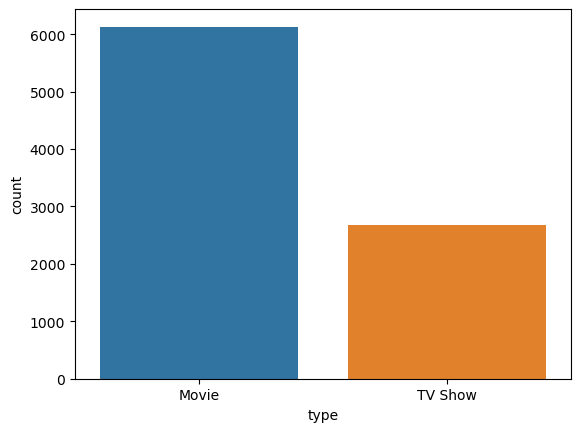

In [76]:
sns.countplot(x='type',data=data)

### Top 5 countries with the highest number of TV shows produced

In [77]:
data[data['type']=='TV Show']['country'].value_counts().head(5)

country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Name: count, dtype: int64

### All movies released in 2013

In [78]:
data[(data['type']=='Movie') &  (data['release_year']==2020)] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
78,s79,Movie,Tughlaq Durbar,Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",NaN,"September 11, 2021",2020,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
84,s85,Movie,Omo Ghetto: the Saga,"JJC Skillz, Funke Akindele","Funke Akindele, Ayo Makun, Chioma Chukwuka Akp...",Nigeria,"September 10, 2021",2020,TV-MA,147 min,"Action & Adventure, Comedies, Dramas",Twins are reunited as a good-hearted female ga...
103,s104,Movie,Shadow Parties,Yemi Amodu,"Jide Kosoko, Omotola Jalade-Ekeinde, Yemi Blaq...",NaN,"September 6, 2021",2020,TV-MA,117 min,"Dramas, International Movies, Thrillers",A family faces destruction in a long-running c...
...,...,...,...,...,...,...,...,...,...,...,...,...
3046,s3047,Movie,All the Freckles in the World,Yibrán Asuad,"Hánssel Casillas, Loreto Peralta, Andrea Sutto...",Mexico,"January 3, 2020",2020,TV-14,90 min,"Comedies, International Movies, Romantic Movies",Thirteen-year-old José Miguel is immune to 199...
3060,s3061,Movie,Ghost Stories,"Anurag Kashyap, Dibakar Banerjee, Karan Johar,...","Janhvi Kapoor, Sobhita Dhulipala, Sukant Goel,...",India,"January 1, 2020",2020,TV-MA,145 min,"Horror Movies, International Movies, Thrillers","The directors of Emmy-nominated ""Lust Stories""..."
5972,s5973,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...
7594,s7595,Movie,Norm of the North: Family Vacation,Anthony Bell,"Andrew Toth, Lisa Durupt, Jonathan Holmes, Pau...",United States,"May 25, 2020",2020,TV-Y7,89 min,Children & Family Movies,"Stressed by his duties as king and father, Nor..."


### The title of of all TV shows produced in India?

In [79]:
data[(data['type']=='TV Show') &  (data['country']=='India')]['title'] 

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

###  Bar Graph of number of TV shows and Movies releases since and including 20010 

In [80]:
data_2010 = data[data['release_year']>=2010]['release_year'].value_counts()   # Counts the number of TV shows and Movies releases since and including 2010

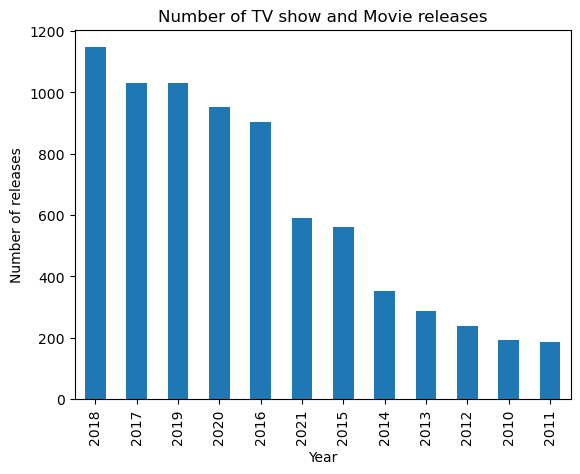

In [81]:
data_2010.plot(kind='bar',xlabel='Year',ylabel='Number of releases',title='Number of TV show and Movie releases')
plt.show()

### Which year had the highest number of TV shows and Movies added to Netflix? Show with a Bar Graph.

In [82]:
data.date_added[0]

'September 25, 2021'

In [87]:
data.date_added=pd.to_datetime(data.date_added,errors="coerce")

In [90]:
data['date_added'].dt.year.value_counts().head(7) # Counts the number of shows and TV shows added to Netflix each year.

date_added
2019.0    1999
2020.0    1878
2018.0    1625
2021.0    1498
2017.0    1164
2016.0     418
2015.0      73
Name: count, dtype: int64

In [91]:
# We observe that the amount of content added to Netflix in 2020 is lower than in 2019.

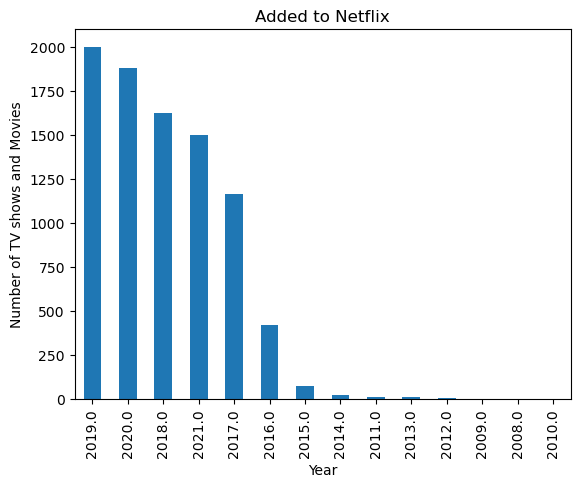

In [94]:
data['date_added'].dt.year.value_counts().plot(kind='bar',xlabel='Year',ylabel='Number of TV shows and Movies', title='Added to Netflix')
plt.show()

### Title of all movies that are comedies or created in the India

In [96]:
data[(data['type']=='Movie') & (data['listed_in']=='Comedies')  |  (data['country']=='India') ]['title']

4              Kota Factory
24                    Jeans
27                Grown Ups
39             Chhota Bheem
50            Dharmakshetra
               ...         
8773    Yanda Kartavya Aahe
8775        Yeh Meri Family
8798               Zed Plus
8799                  Zenda
8806                 Zubaan
Name: title, Length: 1082, dtype: object

###  Ratings defined by Netflix

In [97]:
data.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [98]:
data.rating.value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

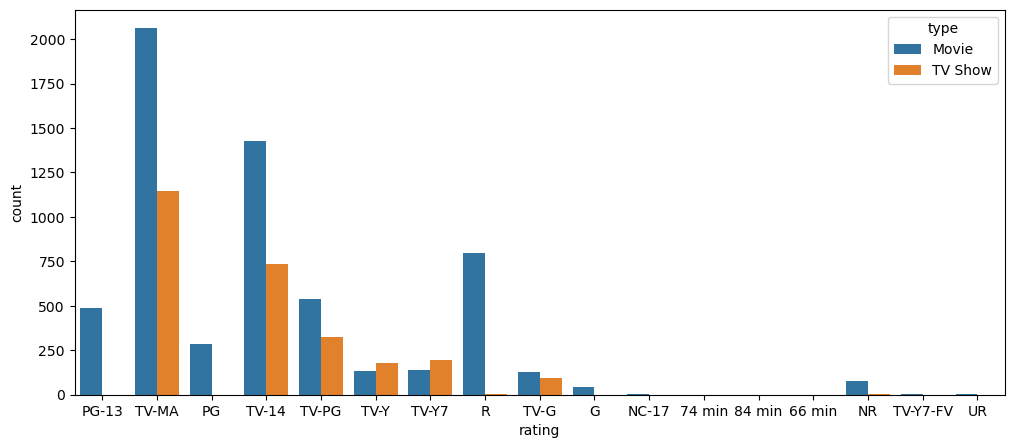

In [101]:
fig = plt.figure(figsize=(12,5))
sns.countplot(x='rating',data=data, hue='type')
plt.show()

### Movies Listed_in as Dramas or TV Shows Listed_in as an Anime Series

In [103]:
data[  (data['type']=='Movie') & (data['listed_in']=='Dramas') | (data['type']=='TV Show') & (data['listed_in']=='Anime Series') ].head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
112,s113,Movie,Worth,Sara Colangelo,"Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...",NaN,2021-09-03,2021,PG-13,119 min,Dramas,"In the wake of the Sept. 11 attacks, a lawyer ..."
129,s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States",2021-09-01,2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...
142,s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States",2021-09-01,2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...
162,s163,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong",2021-09-01,2017,PG-13,118 min,Dramas,"This biopic of Thurgood Marshall, the first Bl..."
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada",2021-08-01,2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...
343,s344,Movie,My Girl,Howard Zieff,"Dan Aykroyd, Jamie Lee Curtis, Macaulay Culkin...",United States,2021-08-01,1991,PG-13,102 min,Dramas,This coming-of-age charmer follows a summer in...
376,s377,TV Show,Transformers: War for Cybertron: Kingdom,NaN,"Jake Foushee, Jason Marnocha, Linsay Rousseau,...",NaN,2021-07-29,2021,TV-Y7,1 Season,Anime Series,The frantic race to locate the Allspark first ...
426,s427,Movie,Cousins,"Ainsley Gardiner, Briar Grace-Smith","Rachel House, Briar Grace-Smith, Tanea Heke, T...",New Zealand,2021-07-22,2021,TV-MA,99 min,Dramas,"Separated as children, three cousins with an u..."
446,s447,Movie,The Book of Henry,Colin Trevorrow,"Naomi Watts, Jaeden Martell, Jacob Tremblay, S...",United States,2021-07-16,2017,PG-13,105 min,Dramas,An 11-year-old vows to help a new neighbor who...
599,s600,Movie,The Best of Enemies,Robin Bissell,"Taraji P. Henson, Sam Rockwell, Babou Ceesay, ...",United States,2021-07-01,2019,PG-13,133 min,Dramas,"In 1971, a summit on school integration in Nor..."


In [104]:
data.sort_values(by='release_year', ascending=False)   # Here we sorted the Release_year in decending order

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou..."
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,2021-06-02,2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,2021-06-04,2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,2021-06-04,2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,2021-06-04,2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,2017-03-31,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...


### Movie Durations

In [105]:
Movie_data= data[data['type']=='Movie'] 

In [115]:
Movie_duration=Movie_data.duration.value_counts().head(10) There are 205 Movies in the dataset Movie_data. We will be looking at the top 10 movies with the longest duration. 
Movie_duration

duration
90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
95 min     137
96 min     130
92 min     129
102 min    122
98 min     120
Name: count, dtype: int64

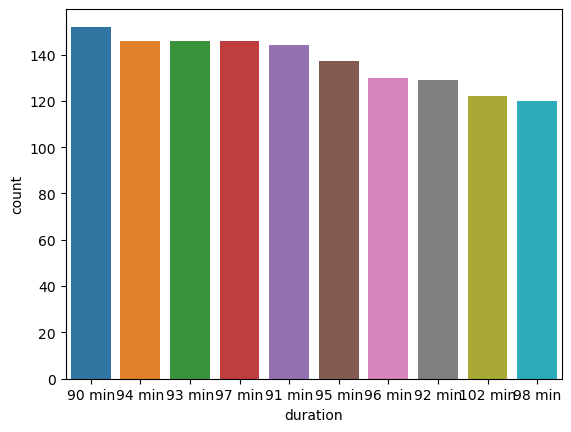

In [116]:
sns.barplot(x = Movie_duration.index, y = Movie_duration);

 ###  Listed_in terms defined by Netflix

In [118]:
data['listed_in'].unique()  

array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [119]:
data.listed_in[1] data['Listed_in'][1] # The Listed_in terms defined by Netflix are strings with commas. We want to split the Listed_in terms into several strings. 

'International TV Shows, TV Dramas, TV Mysteries'

In [121]:
Category= data['listed_in'].str.split(', ',expand=True).stack()   # Here we slit the Listed_in terms whenever a comma appears.
Category

0     0               Documentaries
1     0      International TV Shows
      1                   TV Dramas
      2                TV Mysteries
2     0              Crime TV Shows
                     ...           
8805  0    Children & Family Movies
      1                    Comedies
8806  0                      Dramas
      1        International Movies
      2            Music & Musicals
Length: 19323, dtype: object

In [124]:
Category.value_counts().head(10) #Here are the top 12 single string Listed_in terms.

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

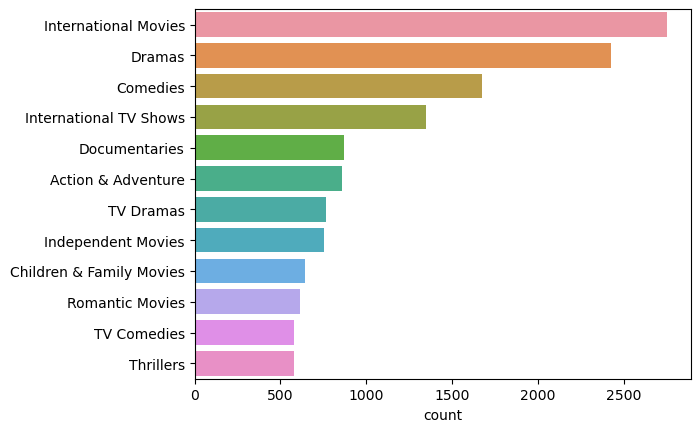

In [128]:
sns.countplot(y=Category,order= Category.value_counts().index[:12])
plt.show()

## Top 10 countries with the highest number of Movies produced

In [129]:
data[data['type']=='Movie']['country'].value_counts().head(10)

country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: count, dtype: int64